In [1]:
%ls data/data_for_model

Parameter format not correct - "data_for_model".


In [1]:
import pandas as pd
import geopandas as gpd

from pathlib import Path
data = Path('data/data_for_model')

In [2]:
def fix_col_names(df, suffix=None):
    df.columns = [c.replace("\'", '') for c in df.columns]
    df = df.rename(columns={attr: f'{attr}_{suffix}' 
                            for attr in ['lst_min', 'lst_max', 'lst_mean', 'lst_count',
                                         'ndvi_min', 'ndvi_max', 'ndvi_mean', 'ndvi_count', 
                                         'ndbi_min', 'ndbi_max', 'ndbi_mean', 'ndbi_count',
                                         'mndwi_min', 'mndwi_max', 'mndwi_mean', 'mndwi_count',
                                         'albedo_min', 'albedo_max', 'albedo_mean', 'albedo_count']})
    return df

def drop_duplicates(df, subset):
    return df.drop_duplicates(subset=subset)

def drop_cols(df, labels=None):
    return df.drop(labels=labels, axis='columns')

def merge_frames(df1, df2):
    return pd.merge(df1, df2, on='idx', suffixes=('', ''))

In [3]:
df = gpd.read_file(f'{data}/20130824_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson')
df = (df.pipe(drop_duplicates, 'idx')
        .pipe(fix_col_names, suffix='20130824')
        .pipe(drop_cols, 'date'))

In [4]:
df.head()

,id_x,mndwi_min_20130824,mndwi_mean_20130824,mndwi_max_20130824,albedo_min_20130824,albedo_mean_20130824,albedo_max_20130824,idx,name,id_y,...,ndvi_min_20130824,ndvi_max_20130824,ndvi_mean_20130824,ndvi_count_20130824,ndbi_min_20130824,ndbi_max_20130824,ndbi_mean_20130824,ndbi_count_20130824,ward_num,geometry
0,"(47965, 87513, 18)",-1.000000,-0.390545,-0.072069,-1.000000,-0.215421,0.180248,4.796588e+11,02L,"(47965, 87513, 18)",...,-1.000000,0.483896,-0.069378,3,-1.000000,0.090930,-0.296063,3,2,"POLYGON ((281388.362 5678062.191, 281392.439 5..."
1,"(47966, 87513, 18)",-0.060380,-0.033725,-0.006637,0.156936,0.163378,0.173463,4.796688e+11,02L,"(47966, 87513, 18)",...,0.317300,0.347431,0.333144,4,-0.001762,0.016641,0.008139,4,2,"POLYGON ((281484.255 5678058.105, 281488.329 5..."
2,"(47967, 87513, 18)",-0.080564,-0.067704,-0.044280,0.167823,0.177890,0.185820,4.796788e+11,02L,"(47967, 87513, 18)",...,0.286925,0.334388,0.310419,3,-0.017477,-0.011142,-0.013409,3,2,"POLYGON ((281580.147 5678054.020, 281584.220 5..."
3,"(47968, 87513, 18)",-0.082785,-0.066112,-0.049741,0.187229,0.198215,0.208880,4.796888e+11,02L,"(47968, 87513, 18)",...,0.314152,0.391033,0.357398,3,-0.014692,0.055719,0.029616,3,2,"POLYGON ((281676.040 5678049.937, 281680.111 5..."
4,"(47969, 87513, 18)",-1.000000,-0.378977,-0.066982,-1.000000,-0.192327,0.218197,4.796988e+11,02L,"(47969, 87513, 18)",...,-1.000000,0.397273,-0.068788,3,-1.000000,0.082472,-0.280624,3,2,"POLYGON ((281771.933 5678045.856, 281776.002 5..."


In [5]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 92596 entries, 0 to 120015
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   id_x                  92596 non-null  object  
 1   mndwi_min_20130824    92596 non-null  float64 
 2   mndwi_mean_20130824   92596 non-null  float64 
 3   mndwi_max_20130824    92596 non-null  float64 
 4   albedo_min_20130824   92596 non-null  float64 
 5   albedo_mean_20130824  92596 non-null  float64 
 6   albedo_max_20130824   92596 non-null  float64 
 7   idx                   92596 non-null  float64 
 8   name                  92586 non-null  object  
 9   id_y                  92596 non-null  object  
 10  title                 92596 non-null  object  
 11  lst_min_20130824      92596 non-null  float64 
 12  lst_max_20130824      92596 non-null  float64 
 13  lst_mean_20130824     92596 non-null  float64 
 14  lst_count_20130824    92596 non-null  int64  

In [6]:
import re
month = re.compile(r'(\d{4})(\d{2})(\d{2})_') 

for file in sorted((data).glob('*.geojson'))[1:]:
    print('Processing...', file, end=' ')
    res = re.search(month, str(file))
    df2 = (gpd.read_file(file)
              .pipe(drop_duplicates, 'idx')
              .pipe(fix_col_names, f'{res.group(1)}{res.group(2)}{res.group(3)}')
              .pipe(drop_cols, ['id_x', 'id_y','title', 'ward_num', 'name', 'date', 'geometry']))
    df = df.pipe(merge_frames, df2)
    print(df.shape)

Processing... data\data_for_model\20140608_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 43)
Processing... data\data_for_model\20140624_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 61)
Processing... data\data_for_model\20140710_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 79)
Processing... data\data_for_model\20140726_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 97)
Processing... data\data_for_model\20140811_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 115)
Processing... data\data_for_model\20140827_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 133)
Processing... data\data_for_model\20150627_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 151)
Processing... data\data_for_model\20150830_calgary_grid_with_lst_ndvi_ndbi_mndwi_albedo_ward_comm.geojson (92596, 169)
Processing... data\data_for_model\20160629_calgary_g

In [19]:
df

,id_x,mndwi_min_20130824,mndwi_mean_20130824,mndwi_max_20130824,albedo_min_20130824,albedo_mean_20130824,albedo_max_20130824,idx,name,id_y,...,lst_mean_20200726,lst_count_20200726,ndvi_min_20200726,ndvi_max_20200726,ndvi_mean_20200726,ndvi_count_20200726,ndbi_min_20200726,ndbi_max_20200726,ndbi_mean_20200726,ndbi_count_20200726
0,"(47965, 87513, 18)",-1.000000,-0.390545,-0.072069,-1.000000,-0.215421,0.180248,4.796588e+11,02L,"(47965, 87513, 18)",...,-28.108131,3,-1.000000,0.588520,0.029376,3,-1.000000,0.236636,-0.190526,3
1,"(47966, 87513, 18)",-0.060380,-0.033725,-0.006637,0.156936,0.163378,0.173463,4.796688e+11,02L,"(47966, 87513, 18)",...,21.718426,4,0.422113,0.492615,0.457013,4,0.129523,0.164373,0.145174,4
2,"(47967, 87513, 18)",-0.080564,-0.067704,-0.044280,0.167823,0.177890,0.185820,4.796788e+11,02L,"(47967, 87513, 18)",...,21.358757,3,0.414586,0.459684,0.435247,3,0.114048,0.127405,0.119937,3
3,"(47968, 87513, 18)",-0.082785,-0.066112,-0.049741,0.187229,0.198215,0.208880,4.796888e+11,02L,"(47968, 87513, 18)",...,20.995461,3,0.399144,0.529849,0.477338,3,0.128686,0.229414,0.184333,3
4,"(47969, 87513, 18)",-1.000000,-0.378977,-0.066982,-1.000000,-0.192327,0.218197,4.796988e+11,02L,"(47969, 87513, 18)",...,-28.870875,3,-1.000000,0.545677,0.003995,3,-1.000000,0.255508,-0.185331,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92591,"(48096, 87940, 18)",-1.000000,-0.392261,0.099670,-1.000000,-0.168203,0.503583,4.809688e+11,12I,"(48096, 87940, 18)",...,-45.297618,9,-1.000000,0.792049,-0.030452,9,-1.000000,0.468444,-0.218780,9
92592,"(48092, 87941, 18)",-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4.809288e+11,12I,"(48092, 87941, 18)",...,-128.320041,9,-1.000000,-1.000000,-1.000000,9,-1.000000,-1.000000,-1.000000,9
92593,"(48093, 87941, 18)",-1.000000,-0.457297,0.089643,-1.000000,-0.280539,0.466323,4.809388e+11,12I,"(48093, 87941, 18)",...,-54.112756,10,-1.000000,0.744805,-0.164786,10,-1.000000,0.408239,-0.318211,10
92594,"(48094, 87941, 18)",-1.000000,-0.457532,0.089528,-1.000000,-0.259848,0.489925,4.809488e+11,12I,"(48094, 87941, 18)",...,-53.543152,6,-1.000000,0.716283,-0.144459,6,-1.000000,0.377266,-0.324017,6


In [22]:
ndvi_df = df[[c for c in df.columns if c.startswith('ndvi_mean_')] + ['id_x']]

<AxesSubplot:>

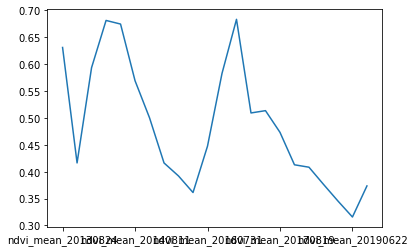

In [24]:
ndvi_df.iloc[5000].drop('id_x').plot()

In [25]:
df.to_feather(f'{data}/lst_ndvi_ndbi_mndwi_albedo_2013_2020_summer.feather')

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [26]:
df.shape

(92596, 403)

In [27]:
grid = df[['id_x', 'title', 'idx', 'ward_num', 'name', 'geometry']]
index = df[df.columns.difference(['id_x', 'title', 'ward_num','name', 'geometry'])]

In [28]:
grid.to_feather(f'{data}/grid.feather')

C:\Users\Gramener\.conda\envs\eg_py37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: this is an initial implementation of Parquet/Feather file support and associated metadata.  This is tracking version 0.1.0 of the metadata specification at https://github.com/geopandas/geo-arrow-spec

This metadata specification does not yet make stability promises.  We do not yet recommend using this in a production setting unless you are able to rewrite your Parquet/Feather files.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')
  """Entry point for launching an IPython kernel.


In [29]:
index.head()

,albedo_max_20130824,albedo_max_20140608,albedo_max_20140624,albedo_max_20140710,albedo_max_20140726,albedo_max_20140811,albedo_max_20140827,albedo_max_20150627,albedo_max_20150830,albedo_max_20160629,...,ndvi_min_20170702,ndvi_min_20170718,ndvi_min_20170803,ndvi_min_20170819,ndvi_min_20180705,ndvi_min_20180721,ndvi_min_20180822,ndvi_min_20180907,ndvi_min_20190622,ndvi_min_20200726
0,0.180248,0.180248,0.180248,0.180248,0.180248,0.180248,0.180248,0.180248,0.180248,0.180248,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,0.173463,0.173463,0.173463,0.173463,0.173463,0.173463,0.173463,0.173463,0.173463,0.173463,...,0.426535,0.424090,0.312699,0.271871,0.433382,0.353476,0.318495,0.256736,0.375044,0.422113
2,0.185820,0.185820,0.185820,0.185820,0.185820,0.185820,0.185820,0.185820,0.185820,0.185820,...,0.398370,0.405348,0.311802,0.260657,0.379617,0.355653,0.290749,0.242257,0.345847,0.414586
3,0.208880,0.208880,0.208880,0.208880,0.208880,0.208880,0.208880,0.208880,0.208880,0.208880,...,0.374581,0.437260,0.331078,0.274804,0.429592,0.347074,0.309853,0.272339,0.325610,0.399144
4,0.218197,0.218197,0.218197,0.218197,0.218197,0.218197,0.218197,0.218197,0.218197,0.218197,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000


In [30]:
cols = set(c.rsplit('_', 1)[0]+'_' for c in index.columns if c != 'idx')

In [31]:
cols

{'albedo_max_',
 'albedo_mean_',
 'albedo_min_',
 'id_',
 'lst_count_',
 'lst_max_',
 'lst_mean_',
 'lst_min_',
 'mndwi_max_',
 'mndwi_mean_',
 'mndwi_min_',
 'ndbi_count_',
 'ndbi_max_',
 'ndbi_mean_',
 'ndbi_min_',
 'ndvi_count_',
 'ndvi_max_',
 'ndvi_mean_',
 'ndvi_min_'}

In [32]:
index = pd.wide_to_long(index, stubnames=cols, i='idx', j='year').reset_index()

In [33]:
index.head()

,idx,year,id_y,albedo_max_,albedo_min_,ndbi_mean_,ndbi_max_,mndwi_mean_,ndbi_count_,mndwi_max_,...,mndwi_min_,ndbi_min_,ndvi_count_,ndvi_max_,ndvi_min_,lst_max_,lst_mean_,lst_min_,ndvi_mean_,id_
0,4.796588e+11,20130824,"(47965, 87513, 18)",0.180248,-1.000000,-0.296063,0.090930,-0.390545,3,-0.072069,...,-1.000000,-1.000000,3,0.483896,-1.000000,26.289375,-25.266223,-128.320053,-0.069378,NaN
1,4.796688e+11,20130824,"(47966, 87513, 18)",0.173463,0.156936,0.008139,0.016641,-0.033725,4,-0.006637,...,-0.060380,-0.001762,4,0.347431,0.317300,26.555275,26.446438,26.338713,0.333144,NaN
2,4.796788e+11,20130824,"(47967, 87513, 18)",0.185820,0.167823,-0.013409,-0.011142,-0.067704,3,-0.044280,...,-0.080564,-0.017477,3,0.334388,0.286925,26.643635,26.630246,26.605150,0.310419,NaN
3,4.796888e+11,20130824,"(47968, 87513, 18)",0.208880,0.187229,0.029616,0.055719,-0.066112,3,-0.049741,...,-0.082785,-0.014692,3,0.391033,0.314152,26.622849,26.609970,26.602516,0.357398,NaN
4,4.796988e+11,20130824,"(47969, 87513, 18)",0.218197,-1.000000,-0.280624,0.082472,-0.378977,3,-0.066982,...,-1.000000,-1.000000,3,0.397273,-1.000000,26.606913,-25.037160,-128.320053,-0.068788,NaN


In [34]:
index.shape

(2037112, 22)

In [35]:
index['month'] = pd.to_datetime(index.year, format="%Y%m%d").dt.month
index['year' ] = pd.to_datetime(index.year, format="%Y%m%d").dt.year
#index['day' ] = pd.to_datetime(index.year, format="%Y%m%d").dt.day

In [36]:
index.head(20)

,idx,year,id_y,albedo_max_,albedo_min_,ndbi_mean_,ndbi_max_,mndwi_mean_,ndbi_count_,mndwi_max_,...,ndbi_min_,ndvi_count_,ndvi_max_,ndvi_min_,lst_max_,lst_mean_,lst_min_,ndvi_mean_,id_,month
0,4.796588e+11,2013,"(47965, 87513, 18)",0.180248,-1.000000,-0.296063,0.090930,-0.390545,3,-0.072069,...,-1.000000,3,0.483896,-1.000000,26.289375,-25.266223,-128.320053,-0.069378,NaN,8
1,4.796688e+11,2013,"(47966, 87513, 18)",0.173463,0.156936,0.008139,0.016641,-0.033725,4,-0.006637,...,-0.001762,4,0.347431,0.317300,26.555275,26.446438,26.338713,0.333144,NaN,8
2,4.796788e+11,2013,"(47967, 87513, 18)",0.185820,0.167823,-0.013409,-0.011142,-0.067704,3,-0.044280,...,-0.017477,3,0.334388,0.286925,26.643635,26.630246,26.605150,0.310419,NaN,8
3,4.796888e+11,2013,"(47968, 87513, 18)",0.208880,0.187229,0.029616,0.055719,-0.066112,3,-0.049741,...,-0.014692,3,0.391033,0.314152,26.622849,26.609970,26.602516,0.357398,NaN,8
4,4.796988e+11,2013,"(47969, 87513, 18)",0.218197,-1.000000,-0.280624,0.082472,-0.378977,3,-0.066982,...,-1.000000,3,0.397273,-1.000000,26.606913,-25.037160,-128.320053,-0.068788,NaN,8
5,4.797088e+11,2013,"(47970, 87513, 18)",0.233595,-1.000000,-0.556261,0.141468,-0.638059,5,-0.090342,...,-1.000000,5,0.451058,-1.000000,26.377798,-66.467163,-128.320053,-0.434051,NaN,8
6,4.797188e+11,2013,"(47971, 87513, 18)",0.243192,-1.000000,-0.527949,0.152285,-0.614420,7,-0.098568,...,-1.000000,7,0.446426,-1.000000,26.096226,-62.216261,-128.320053,-0.396303,NaN,8
7,4.797288e+11,2013,"(47972, 87513, 18)",0.248174,-1.000000,-0.344994,0.159436,-0.498059,7,-0.106089,...,-1.000000,7,0.443588,-1.000000,25.546572,-40.542502,-128.320053,-0.184165,NaN,8
8,4.797388e+11,2013,"(47973, 87513, 18)",0.268192,-1.000000,-0.452016,0.133459,-0.577284,6,-0.137091,...,-1.000000,6,0.431849,-1.000000,25.005737,-51.704458,-128.320053,-0.302749,NaN,8
9,4.797488e+11,2013,"(47974, 87513, 18)",0.244823,-1.000000,-0.453668,0.106058,-0.583488,6,-0.147383,...,-1.000000,6,0.508651,-1.000000,24.563053,-51.968602,-128.320053,-0.268328,NaN,8


In [37]:
index.to_feather(f'{data}/index.feather')

In [38]:
index[index.idx == 479318754718]

,idx,year,id_y,albedo_max_,albedo_min_,ndbi_mean_,ndbi_max_,mndwi_mean_,ndbi_count_,mndwi_max_,...,ndbi_min_,ndvi_count_,ndvi_max_,ndvi_min_,lst_max_,lst_mean_,lst_min_,ndvi_mean_,id_,month
4159,4.793188e+11,2013,"(47931, 87547, 18)",0.298457,0.182942,0.302291,0.548456,0.014531,12,0.167240,...,-0.065761,12,0.674303,0.333204,25.769735,24.925451,24.275644,0.527254,NaN,8
96755,4.793188e+11,2014,"(47931, 87547, 18)",0.298457,0.182942,-0.135482,-0.038860,0.014531,12,0.167240,...,-0.207255,12,0.304212,0.232636,34.608147,33.609736,31.874876,0.254475,NaN,6
189351,4.793188e+11,2014,"(47931, 87547, 18)",0.298457,0.182942,0.058608,0.205200,0.014531,12,0.167240,...,-0.110043,12,0.604326,0.177242,22.316914,21.363002,20.825645,0.407470,NaN,6
281947,4.793188e+11,2014,"(47931, 87547, 18)",0.298457,0.182942,0.246172,0.519383,0.014531,12,0.167240,...,-0.131400,12,0.825621,0.155669,25.743540,24.176076,22.519167,0.560728,NaN,7
374543,4.793188e+11,2014,"(47931, 87547, 18)",0.298457,0.182942,0.286477,0.566171,0.014531,12,0.167240,...,-0.103809,12,0.833832,0.196283,23.120653,21.860140,20.802065,0.587355,NaN,7
467139,4.793188e+11,2014,"(47931, 87547, 18)",0.298457,0.182942,0.201867,0.413646,0.014531,12,0.167240,...,-0.134256,12,0.710606,0.151774,24.597782,23.690300,23.211102,0.453635,NaN,8
559735,4.793188e+11,2014,"(47931, 87547, 18)",0.298457,0.182942,-0.001197,0.216711,0.014531,12,0.167240,...,-0.163247,12,0.529096,0.137708,25.779013,25.441017,25.224457,0.270373,NaN,8
652331,4.793188e+11,2015,"(47931, 87547, 18)",0.298457,0.182942,0.229619,0.488324,0.014531,12,0.167240,...,-0.173162,12,0.787382,0.111892,33.972256,32.295850,31.008554,0.522996,NaN,6
744927,4.793188e+11,2015,"(47931, 87547, 18)",0.298457,0.182942,0.140980,0.204082,0.014531,12,0.167240,...,0.072705,12,0.116567,0.036900,19.176058,18.756433,18.361626,0.086297,NaN,8
837523,4.793188e+11,2016,"(47931, 87547, 18)",0.298457,0.182942,0.229983,0.553617,0.014531,12,0.167240,...,-0.114381,12,0.786487,0.138987,28.252399,26.309476,24.600197,0.480835,NaN,6


In [39]:
index_yearly = (index.groupby(['idx', 'year'])
                     .mean()
                     .reset_index()
                     .drop(columns='month'))

In [40]:
index_yearly.head(20)

,idx,year,albedo_max_,albedo_min_,ndbi_mean_,ndbi_max_,mndwi_mean_,ndbi_count_,mndwi_max_,albedo_mean_,...,mndwi_min_,ndbi_min_,ndvi_count_,ndvi_max_,ndvi_min_,lst_max_,lst_mean_,lst_min_,ndvi_mean_,id_
0,4.782988e+11,2013,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
1,4.782988e+11,2014,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
2,4.782988e+11,2015,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
3,4.782988e+11,2016,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
4,4.782988e+11,2017,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
5,4.782988e+11,2018,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
6,4.782988e+11,2019,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
7,4.782988e+11,2020,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,3.0,-1.000000,-1.000000,...,-1.0,-1.0,3.0,-1.000000,-1.0,-128.320053,-128.320048,-128.320053,-1.000000,NaN
8,4.783088e+11,2013,0.339839,-1.0,-0.229877,0.067435,-0.135602,12.0,0.158836,-0.000307,...,-1.0,-1.0,12.0,0.548273,-1.0,25.410780,-14.573265,-128.320053,0.114611,NaN
9,4.783088e+11,2014,0.339839,-1.0,-0.193463,0.143340,-0.135602,12.0,0.158836,-0.000307,...,-1.0,-1.0,12.0,0.516149,-1.0,23.622552,-16.037849,-128.320053,0.113736,NaN


In [41]:
index_yearly.to_feather(f'{data}/index_yearly.feather')